<h1 align="center">Dijkstra's Algorithm</h1>
<h3 align = "center"> <b> The following is a graph that you have to ensure you get from A to Z, by using minimum cost. </b> </h3>

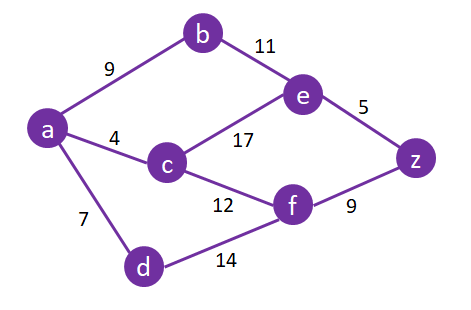

### The graph should look like this in a hash table -

In [266]:
graph = {}
graph["a"] = {}
graph["a"]["b"] = 9
graph["a"]["c"] = 4
graph["a"]["d"] = 7
graph["b"] = {}
graph["b"]["e"] = 11
graph["c"] = {}
graph["c"]["e"] = 17
graph["c"]["f"] = 12
graph["d"] ={}
graph["d"]["f"] = 14
graph["e"] = {}
graph["e"]["z"] = 5
graph["f"] = {}
graph["f"]["z"] = 9
graph["z"] = None

| Node | Neighbor | Costs |
|------|----------|--------|
| a    | b        | 9      |
| a    | c        | 4      |
| a    | d        | 7      |
| b    | e        | 11     |
| c    | e        | 17     |
| c    | f        | 12     |
| d    | f        | 12     |
| e    | z        | 5      |
| f    | z        | 9      |
| z    |          |        |

Now we are going to need a hash table for costs:

In [293]:
costs = {}
costs ["b"] = 9
costs ["c"] = 4
costs ["d"] = 7
costs["e"] = float("inf")
costs["f"] = float("inf")
costs ["z"] = float("inf")

In [276]:
print(costs)

{'b': 9, 'c': 4, 'd': 7, 'e': inf, 'f': inf, 'z': inf}


We also need a hashtable for parents

In [290]:
parents = {}
parents["b"] = "a"
parents["c"] = "a"
parents["d"] = "a"
# parents["e"] = "c"
# parents["e"] = "b"
# parents["f"] = "c"
# parents["f"] = "d"
parents["z"] = None

In [270]:
print(parents)

{'b': 'a', 'c': 'a', 'd': 'a', 'z': None}


In [271]:
def find_lowest_cost_node(costs,processed):
  lowest_cost = float("inf")
  lowest_cost_node = None
  for node in costs:
    cost = costs[node]
    if cost < lowest_cost and node not in processed:
      lowest_cost = cost
      lowest_cost_node = node
  return lowest_cost_node

In [286]:
def dijkstras_algorithm(graph,costs,parents):
  cost = 0
  processed = []
  node = find_lowest_cost_node(costs,processed)
  while node is not None:
    cost = costs[node]
    print("-------------------------")
    print(f"Node: {node} Cost:{cost}")
    print("-------------------------")
    neighbors = graph[node]
    print(f"neighbours of {node} are {neighbors}")
    if neighbors !=None:
      for n in neighbors.keys():
        new_cost = cost + neighbors[n]
        print(costs)
        print(f"New cost to get to {node}=>{n}: {new_cost}")
        if new_cost < costs[n]:
          costs[n] = new_cost # update cost
          parents[n] = node # new node becomes new parent for this neighbor
          print(f"Parent of {n} is now {node}")
      print("\n")
    processed.append(node)
    node = find_lowest_cost_node(costs,processed)
  print("\n")
  print("Nodes Processed: ",processed)
  return costs

In [294]:
print("\n")
start_node = "a"
distances = dijkstras_algorithm(graph,costs,parents)
print("Shortest distances from node '{}' to all other nodes:".format(start_node))
for node, distance in distances.items():
    print("Node '{}' : Distance = {}".format(node, distance))



-------------------------
Node: c Cost:4
-------------------------
neighbours of c are {'e': 17, 'f': 12}
{'b': 9, 'c': 4, 'd': 7, 'e': inf, 'f': inf, 'z': inf}
New cost to get to c=>e: 21
Parent of e is now c
{'b': 9, 'c': 4, 'd': 7, 'e': 21, 'f': inf, 'z': inf}
New cost to get to c=>f: 16
Parent of f is now c


-------------------------
Node: d Cost:7
-------------------------
neighbours of d are {'f': 14}
{'b': 9, 'c': 4, 'd': 7, 'e': 21, 'f': 16, 'z': inf}
New cost to get to d=>f: 21


-------------------------
Node: b Cost:9
-------------------------
neighbours of b are {'e': 11}
{'b': 9, 'c': 4, 'd': 7, 'e': 21, 'f': 16, 'z': inf}
New cost to get to b=>e: 20
Parent of e is now b


-------------------------
Node: f Cost:16
-------------------------
neighbours of f are {'z': 9}
{'b': 9, 'c': 4, 'd': 7, 'e': 20, 'f': 16, 'z': inf}
New cost to get to f=>z: 25
Parent of z is now f


-------------------------
Node: e Cost:20
-------------------------
neighbours of e are {'z': 5}
{'b'